In [39]:
! pip install plotly==4.1.0

    100% |████████████████████████████████| 7.1MB 527kB/s eta 0:00:01    78% |█████████████████████████       | 5.5MB 22.0MB/s eta 0:00:01
  Found existing installation: plotly 4.1.1
    Uninstalling plotly-4.1.1:
      Successfully uninstalled plotly-4.1.1


In [42]:
import plotly.express as px

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

# Setting up the DataFrame to do EDA

In [6]:
df = pd.read_pickle('df_1950to2019_stats.pickle')

In [3]:
draft_df = pd.read_pickle('draft_history_df.pickle')

In [10]:
merged_df = df.merge(draft_df[['pid','year','from','to']],on='pid',how='left')

In [11]:
merged_df.shape

(26338, 55)

In [12]:
merged_df = merged_df[merged_df.year.isna()==False]

In [13]:
merged_df.player = [player.strip('*') for player in merged_df.player]

#### Decided to use only data starting from the year that the NBA introduced the 3-point line

In [14]:
df_3p_era = merged_df[merged_df['3p'].isna()==False]

In [15]:
df_3p_era['3p_pct'] = df_3p_era['3p_pct'].fillna(0)

In [16]:
# changing all string formatted numerical data into numerical format
for col in df_3p_era.columns:
    try:
        df_3p_era[col] = pd.to_numeric(df_3p_era[col])
    except:
        pass

In [17]:
# creating experience feature (how long the player was in the NBA at the point in time the stats were recorded)
df_3p_era['experience'] = df_3p_era.season - df_3p_era['from']

In [30]:
# calculating how many fantasy points each player would've scored for the season
# using Yahoo's fantasy basketball scoring system
df_3p_era['ftsy_pts']=(df_3p_era.pts*1)+(df_3p_era.trb*1.2)+(df_3p_era.ast*1.5)+(df_3p_era.blk*3)+(df_3p_era.stl*3)-(df_3p_era.tov)

## Determining which metric to predict

Who will perform better for fantasy basketball?

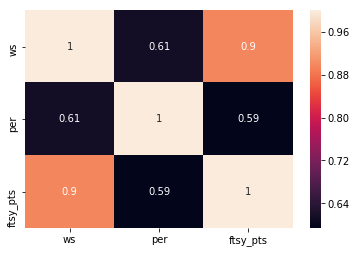

In [35]:
sns.heatmap(df_3p_era[['ws','per', 'ftsy_pts']].corr(), annot=True)

###### Win share (ws) has a much higher correlation to fantasy points (ftsy_pts) which means win share is a better predictor in who will perform better in a fantasy basketball league

In [48]:
grouped_exp_df = df_3p_era.groupby('experience').sum().reset_index()

In [51]:
fig = px.line(grouped_exp_df, x='experience', y="ws")
fig.show()